In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dev_2020 = pd.read_csv('developer_survey/developer_survey_2020/survey_results_public2020.csv')
dev_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
dev_2019 = pd.read_csv('developer_survey/developer_survey_2019/survey_results_public2019.csv', usecols =['Respondent',
                                                                                                        'CareerSat',
                                                                                                        'JobSat',
                                                                                                        'WorkRemote',
                                                                                                        'WorkLoc'])
dev_2019.head()

,Respondent,CareerSat,JobSat,WorkRemote,WorkLoc
0,1,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN
2,3,Slightly satisfied,Slightly satisfied,Less than once per month / Never,Home
3,4,Very satisfied,Slightly satisfied,Less than once per month / Never,Home
4,5,Very dissatisfied,Slightly dissatisfied,A few days each month,Office


In [12]:
dev_2019['WorkLoc'].value_counts(normalize=True) * 100

Office                                            57.943045
Home                                              33.228178
Other place, such as a coworking space or cafe     8.828777
Name: WorkLoc, dtype: float64

In [13]:
dev_2019['WorkRemote'].value_counts(normalize=True) * 100

Less than once per month / Never                           42.996984
A few days each month                                      24.531899
All or almost all the time (I'm full-time remote)          12.043993
Less than half the time, but at least one day each week     8.992089
It's complicated                                            5.228786
More than half, but not all, the time                       3.380570
About half the time                                         2.825679
Name: WorkRemote, dtype: float64

In [16]:
dev_2019['JobSat'].value_counts(normalize = True) * 100

Slightly satisfied                    34.100130
Very satisfied                        31.627881
Slightly dissatisfied                 15.146222
Neither satisfied nor dissatisfied    12.283766
Very dissatisfied                      6.842001
Name: JobSat, dtype: float64

In [4]:
dev_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Respondent  88883 non-null  int64 
 1   CareerSat   72847 non-null  object
 2   JobSat      70988 non-null  object
 3   WorkRemote  70284 non-null  object
 4   WorkLoc     70055 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [5]:
dev_2019_wfh = dev_2019[dev_2019['WorkRemote'] == "All or almost all the time (I'm full-time remote)"]
dev_2019_wfh

,Respondent,CareerSat,JobSat,WorkRemote,WorkLoc
6,7,Slightly satisfied,Neither satisfied nor dissatisfied,All or almost all the time (I'm full-time remote),"Other place, such as a coworking space or cafe"
12,13,Very satisfied,Very satisfied,All or almost all the time (I'm full-time remote),Home
27,28,Very satisfied,Very satisfied,All or almost all the time (I'm full-time remote),Home
41,42,Neither satisfied nor dissatisfied,Slightly satisfied,All or almost all the time (I'm full-time remote),Office
65,66,Very satisfied,Very satisfied,All or almost all the time (I'm full-time remote),Home
...,...,...,...,...,...
88275,88827,Very satisfied,Very satisfied,All or almost all the time (I'm full-time remote),Home
88278,88830,Very satisfied,Very satisfied,All or almost all the time (I'm full-time remote),Home
88282,88834,Slightly satisfied,Neither satisfied nor dissatisfied,All or almost all the time (I'm full-time remote),Home
88287,88839,Slightly satisfied,Very satisfied,All or almost all the time (I'm full-time remote),Home


In [10]:
dev_2019_wfh['WorkLoc'].value_counts(normalize=True) * 100

Home                                              73.365155
Office                                            14.725537
Other place, such as a coworking space or cafe    11.909308
Name: WorkLoc, dtype: float64

In [23]:
z = dev_2019_wfh['JobSat'].value_counts(normalize=True) * 100
z

Very satisfied                        38.689418
Slightly satisfied                    31.105581
Slightly dissatisfied                 12.454082
Neither satisfied nor dissatisfied    10.866216
Very dissatisfied                      6.884702
Name: JobSat, dtype: float64

In [89]:
wfh_sat = (dev_2019_wfh['JobSat'].value_counts(normalize=True) * 100).rename_axis('Satisfaction').reset_index(name='Percentage')
wfh_sat['Percentage'] = wfh_sat['Percentage'].round(2)
wfh_sat

,Satisfaction,Percentage
0,Very satisfied,38.69
1,Slightly satisfied,31.11
2,Slightly dissatisfied,12.45
3,Neither satisfied nor dissatisfied,10.87
4,Very dissatisfied,6.88


In [6]:
dev_2019_wfh_some = dev_2019[dev_2019['WorkRemote'] == "A few days each month"]
dev_2019_wfh_some

,Respondent,CareerSat,JobSat,WorkRemote,WorkLoc
4,5,Very dissatisfied,Slightly dissatisfied,A few days each month,Office
5,6,Very satisfied,Slightly satisfied,A few days each month,Home
9,10,Slightly dissatisfied,Slightly dissatisfied,A few days each month,Home
15,16,Very satisfied,Slightly satisfied,A few days each month,Home
16,17,Slightly satisfied,Neither satisfied nor dissatisfied,A few days each month,"Other place, such as a coworking space or cafe"
...,...,...,...,...,...
88314,88867,Very satisfied,Very satisfied,A few days each month,Office
88315,88868,Slightly satisfied,Slightly dissatisfied,A few days each month,"Other place, such as a coworking space or cafe"
88318,88871,Very dissatisfied,Very dissatisfied,A few days each month,Office
88325,88878,Very satisfied,Very satisfied,A few days each month,Office


In [11]:
 dev_2019_wfh_some['WorkLoc'].value_counts(normalize=True) * 100

Office                                            68.797431
Home                                              24.197315
Other place, such as a coworking space or cafe     7.005254
Name: WorkLoc, dtype: float64

In [22]:
y = dev_2019_wfh_some['JobSat'].value_counts(normalize=True) * 100
y

Slightly satisfied                    35.409646
Very satisfied                        34.561302
Slightly dissatisfied                 13.724579
Neither satisfied nor dissatisfied    10.685648
Very dissatisfied                      5.618826
Name: JobSat, dtype: float64

In [88]:
some_wfh_sat = (dev_2019_wfh_some['JobSat'].value_counts(normalize=True) * 100).rename_axis('Satisfaction').reset_index(name='Percentage')
some_wfh_sat['Percentage'] = some_wfh_sat['Percentage'].round(2)
some_wfh_sat

,Satisfaction,Percentage
0,Slightly satisfied,35.41
1,Very satisfied,34.56
2,Slightly dissatisfied,13.72
3,Neither satisfied nor dissatisfied,10.69
4,Very dissatisfied,5.62


In [7]:
dev_2019_wfh_never = dev_2019[dev_2019['WorkRemote'] == "Less than once per month / Never"]
dev_2019_wfh_never

,Respondent,CareerSat,JobSat,WorkRemote,WorkLoc
2,3,Slightly satisfied,Slightly satisfied,Less than once per month / Never,Home
3,4,Very satisfied,Slightly satisfied,Less than once per month / Never,Home
8,9,Slightly satisfied,Slightly satisfied,Less than once per month / Never,Office
13,14,Very satisfied,Very satisfied,Less than once per month / Never,Office
17,18,Slightly satisfied,Very satisfied,Less than once per month / Never,Office
...,...,...,...,...,...
88302,88854,Very satisfied,Slightly satisfied,Less than once per month / Never,Office
88308,88860,Slightly dissatisfied,Very dissatisfied,Less than once per month / Never,Office
88324,88877,Very satisfied,Very satisfied,Less than once per month / Never,Office
88326,88879,Slightly satisfied,Neither satisfied nor dissatisfied,Less than once per month / Never,Home


In [9]:
dev_2019_wfh_never['WorkLoc'].value_counts(normalize=True) * 100

Office                                            70.003658
Home                                              21.871154
Other place, such as a coworking space or cafe     8.125187
Name: WorkLoc, dtype: float64

In [21]:
x = dev_2019_wfh_never['JobSat'].value_counts(normalize=True) * 100
x

Slightly satisfied                    34.911262
Very satisfied                        28.153923
Slightly dissatisfied                 16.851883
Neither satisfied nor dissatisfied    12.917565
Very dissatisfied                      7.165367
Name: JobSat, dtype: float64

In [87]:
no_wfh_sat = (dev_2019_wfh_never['JobSat'].value_counts(normalize=True) * 100).rename_axis('Satisfaction').reset_index(name='Percentage')
no_wfh_sat['Percentage'] = no_wfh_sat['Percentage'].round(2)
no_wfh_sat

,Satisfaction,Percentage
0,Slightly satisfied,34.91
1,Very satisfied,28.15
2,Slightly dissatisfied,16.85
3,Neither satisfied nor dissatisfied,12.92
4,Very dissatisfied,7.17


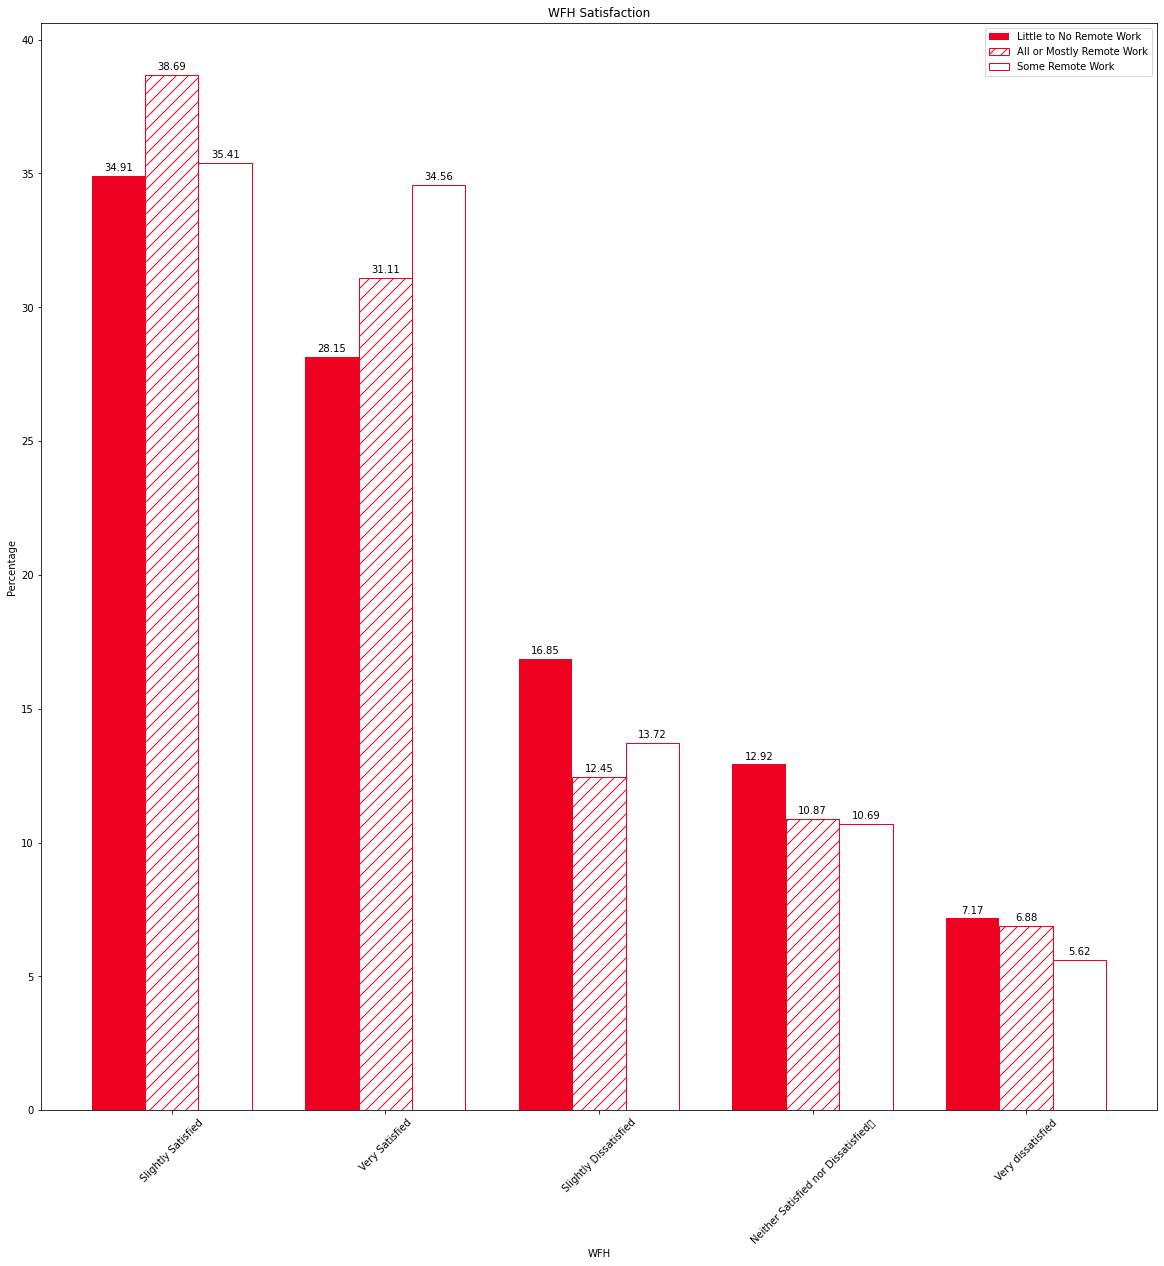

In [107]:
fig, ax = plt.subplots(figsize = (20, 20))

barWidth = 0.25

r1 = np.arange(len(no_wfh_sat['Satisfaction']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

rects1 = ax.bar(r1, no_wfh_sat['Percentage'], label='Little to No Remote Work', 
                width = barWidth, 
                color = '#ED0020')
rects2 = ax.bar(r2, wfh_sat['Percentage'], label='All or Mostly Remote Work', 
                width = barWidth, 
                color='white',
                edgecolor='#ED0020',
                hatch='//')
rects3 = ax.bar(r3, some_wfh_sat['Percentage'], label='Some Remote Work', 
                width = barWidth,
                color="white",
                hatch='0',
                edgecolor='#ED0020',
                ecolor="'#ED0020'")

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

ax.legend()
plt.xlabel("WFH") 
plt.xticks([r + barWidth for r in range(len(no_wfh_sat['Satisfaction']))], ['Slightly Satisfied', 'Very Satisfied', 'Slightly Dissatisfied', 'Neither Satisfied nor Dissatisfied	', 'Very dissatisfied'])
plt.xticks(rotation=45)
plt.ylabel("Percentage") 
plt.title("WFH Satisfaction") 
plt.savefig('dev_wfh_satisfaction.png')
plt.show()
